<a href="https://colab.research.google.com/github/pi-mishra/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Description**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal
and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of
restaurants, and also has food delivery options from partner restaurants in select cities. India is
quite famous for its diverse multi cuisine available in a large number of restaurants and hotel
resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving.
More Indians are warming up to the idea of eating restaurant food whether by dining outside or
getting food delivered. The growing number of restaurants in every state of India has been a
motivation to inspect the data to get some insights, interesting facts and figures about the Indian
food industry in each city. So, this project focuses on analysing the Zomato restaurant data for
each city in India.
The Project focuses on Customers and Company, you have to analyze the sentiments of the
reviews given by the customer in the data and make some useful conclusions in the form of
Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized
as it becomes easy to analyse data at instant. The Analysis also solves some of the business
cases that can directly help the customers finding the Best restaurant in their locality and for the
company to grow up and work on the fields they are currently lagging in. This could help in
clustering the restaurants into segments. Also the data has valuable information around cuisine
and costing which can be used in cost vs. benefit analysis Data could be used for sentiment
analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# Data Description

## Restaurants Data

* Name - Name of the restaurants
* Links - URL links of restaurants
* Cost - Per person estimated cost of dining
* Collection- Tagging of restaurants w.r.t Zomato categories
* Cuisines- Cuisines served by restaurants
* Timings - Restaurants timings

## Review Data

* Reviewer - Name of the reviewer
* review - Review text
* Rating - Rating provided
* MetaData - Reviewer metadata-No of reviews and followers
* Time - Data and time of review
* Pictures - No of pictures posted with review

# Knowing the data

In [55]:
#importing all important packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})

In [56]:
#mounting drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#restaurant data
restaurants_data = pd.read_csv('/content/drive/MyDrive/ZomatoProject/Zomato Restaurant names and Metadata.csv')

#review data
review_data = pd.read_csv('/content/drive/MyDrive/ZomatoProject/Zomato Restaurant reviews.csv')

## Restaurants Data

In [58]:
#data head
restaurants_data.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [59]:
#data shape
restaurants_data.shape

(105, 6)

In [60]:
#information of data
restaurants_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [61]:
#checking for null values

restaurants_data.isnull().mean()

Name           0.000000
Links          0.000000
Cost           0.000000
Collections    0.514286
Cuisines       0.000000
Timings        0.009524
dtype: float64

In [62]:
#getting description of the data

restaurants_data.describe().transpose()

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [63]:
#checking for duplicated rows

duplicated_rows = restaurants_data.duplicated().sum()
print(duplicated_rows)

0


Observation- Restaurants data consist of 105 rows and 6 columns.

## Review Data

In [64]:
#head of data
review_data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [65]:
review_data.shape

(10000, 7)

In [66]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [67]:
review_data.isnull().mean()

Restaurant    0.0000
Reviewer      0.0038
Review        0.0045
Rating        0.0038
Metadata      0.0038
Time          0.0038
Pictures      0.0000
dtype: float64

In [68]:
review_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


In [69]:
review_data.loc[review_data['Rating']== 'Like'] = np.NaN

review_data['Rating'] = review_data['Rating'].astype('float64')

print(review_data.groupby('Restaurant')['Rating'].mean())

Restaurant
10 Downing Street                        3.80
13 Dhaba                                 3.48
3B's - Buddies, Bar & Barbecue           4.76
AB's - Absolute Barbecues                4.88
Absolute Sizzlers                        3.62
                                         ... 
Urban Asia - Kitchen & Bar               3.65
Yum Yum Tree - The Arabian Food Court    3.56
Zega - Sheraton Hyderabad Hotel          4.45
Zing's Northeast Kitchen                 3.65
eat.fit                                  3.20
Name: Rating, Length: 100, dtype: float64


In [70]:
review_data.dtypes

Restaurant     object
Reviewer       object
Review         object
Rating        float64
Metadata       object
Time           object
Pictures      float64
dtype: object

# Data Wrangling

## Restaurants data cleaning

In [71]:
#dropping column collection as 51% of data is missing
restaurants_data.drop('Collections', axis=1, inplace=True)

#dropping the null values
restaurants_data.dropna(subset=['Timings'],inplace=True)

print(restaurants_data.isnull().sum())

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64


In [72]:
#changing cost datatype from object to float

restaurants_data['Cost'] = restaurants_data['Cost'].str.replace(',', '').astype(float)


In [73]:
restaurants_data['Links']

0      https://www.zomato.com/hyderabad/beyond-flavou...
1      https://www.zomato.com/hyderabad/paradise-gach...
2      https://www.zomato.com/hyderabad/flechazo-gach...
3      https://www.zomato.com/hyderabad/shah-ghouse-h...
4      https://www.zomato.com/hyderabad/over-the-moon...
                             ...                        
100    https://www.zomato.com/hyderabad/indiblaze-gac...
101    https://www.zomato.com/hyderabad/sweet-basket-...
102    https://www.zomato.com/hyderabad/angaara-count...
103    https://www.zomato.com/hyderabad/wich-please-1...
104    https://www.zomato.com/hyderabad/republic-of-n...
Name: Links, Length: 104, dtype: object

In [74]:
import re

# Define a regular expression pattern to match the city name in the URL
pattern = r'^https://www\.zomato\.com/([a-zA-Z-]+)/'

# Extract the city name using the pattern and store it in a new column called 'City'
restaurants_data['City'] = restaurants_data['Links'].str.extract(pattern)



In [75]:
restaurants_data.head()

,Name,Links,Cost,Cuisines,Timings,City
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",hyderabad
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800.0,"Biryani, North Indian, Chinese",11 AM to 11 PM,hyderabad
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300.0,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",hyderabad
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800.0,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,hyderabad
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200.0,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",hyderabad


In [76]:
restaurants_data['City'].unique()

array(['hyderabad', nan], dtype=object)

In [77]:
#dropping link and city. As city was extracted from the links column and the data only consists of Hyderabad city both the columns are of no use.

restaurants_data.drop(['City','Links'], axis=1, inplace=True)

## Review data cleaning

In [78]:
review_data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0


In [79]:
review_data['Metadata']

0             1 Review , 2 Followers
1            3 Reviews , 2 Followers
2            2 Reviews , 3 Followers
3              1 Review , 1 Follower
4            3 Reviews , 2 Followers
                    ...             
9995       53 Reviews , 54 Followers
9996        2 Reviews , 53 Followers
9997      65 Reviews , 423 Followers
9998      13 Reviews , 144 Followers
9999    472 Reviews , 1302 Followers
Name: Metadata, Length: 10000, dtype: object

In [80]:
review_data.isnull().mean()


Restaurant    0.0001
Reviewer      0.0039
Review        0.0046
Rating        0.0039
Metadata      0.0039
Time          0.0039
Pictures      0.0001
dtype: float64

In [81]:
#dropping the null values
review_data.dropna(subset=['Restaurant','Reviewer','Review','Rating','Metadata','Time','Pictures'],inplace=True)

print(review_data.isnull().mean())

Restaurant    0.0
Reviewer      0.0
Review        0.0
Rating        0.0
Metadata      0.0
Time          0.0
Pictures      0.0
dtype: float64


In [82]:
review_data['Rating'] = review_data['Rating'].astype(float)

In [83]:
print(review_data['Rating'].dtypes)

float64


In [84]:
review_data['Review_count'] = review_data['Metadata'].str.extract(r'(\d+) (?:Review|Post)')
review_data['Followers'] = review_data['Metadata'].str.extract(r'(\d+) Followers')

In [85]:
review_data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_count,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,1,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,3,2


In [86]:
review_data.isnull().mean()

Restaurant      0.000000
Reviewer        0.000000
Review          0.000000
Rating          0.000000
Metadata        0.000000
Time            0.000000
Pictures        0.000000
Review_count    0.000000
Followers       0.322182
dtype: float64

In [87]:
review_data.drop(['Metadata'],axis=1,inplace= True)

In [88]:
review_data.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Review_count,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3,2


In [89]:
review_data['Followers'].fillna(0,inplace= True)

In [90]:
review_data.isnull().mean()

Restaurant      0.0
Reviewer        0.0
Review          0.0
Rating          0.0
Time            0.0
Pictures        0.0
Review_count    0.0
Followers       0.0
dtype: float64

In [91]:
# Convert "Time" column to datetime format
review_data['Time'] = pd.to_datetime(review_data['Time'])

# Extract "Date", "Time" and "Day" into separate columns
review_data['Date'] = review_data['Time'].dt.date
review_data['Day'] = review_data['Time'].dt.strftime('%A')
review_data['Time'] = review_data['Time'].dt.time

In [92]:
review_data.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Review_count,Followers,Date,Day
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,15:54:00,0.0,1,2,2019-05-25,Saturday
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,14:20:00,0.0,3,2,2019-05-25,Saturday
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,22:54:00,0.0,2,3,2019-05-24,Friday
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,22:11:00,0.0,1,0,2019-05-24,Friday
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,21:37:00,0.0,3,2,2019-05-24,Friday


# Data Visualisation

## Restaurants Data

In [93]:
restaurants_data

,Name,Cost,Cuisines,Timings
0,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800.0,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,1300.0,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,800.0,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,1200.0,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...
100,IndiBlaze,600.0,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,200.0,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,500.0,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,250.0,Fast Food,8am to 12:30AM (Mon-Sun)


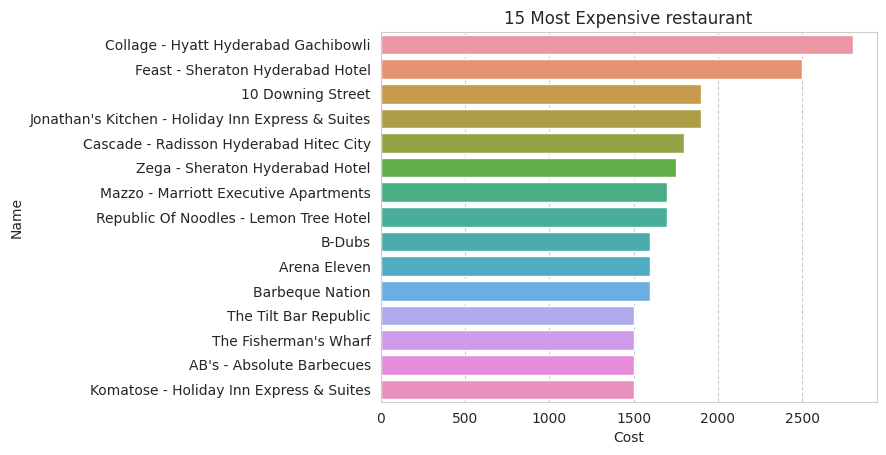

In [94]:
# checking for most expensive Restaurant
sns.barplot(x='Cost',
            y="Name", 
            data=restaurants_data, 
            order=restaurants_data.sort_values('Cost',ascending=False).Name[:15])

plt.title('15 Most Expensive restaurant')
plt.show()

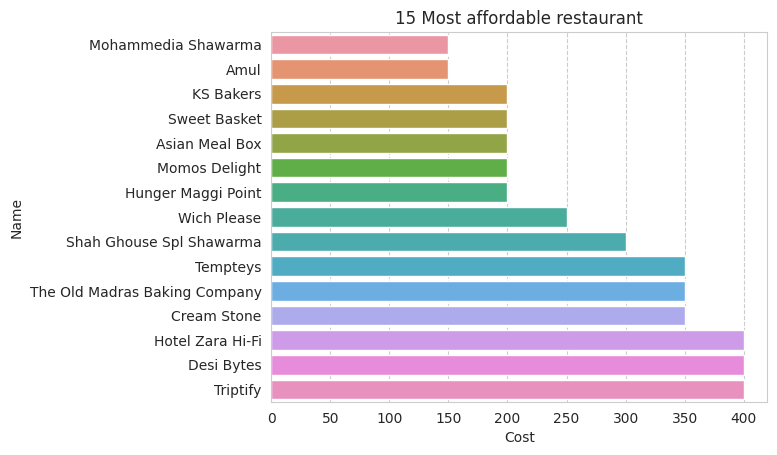

In [95]:
# checking for affordable Restaurants
sns.barplot(x='Cost',
            y="Name", 
            data=restaurants_data, 
            order=restaurants_data.sort_values('Cost',ascending=True).Name[:15])

plt.title('15 Most affordable restaurant')
plt.show()

The average cost per person, taking into account all the restaurants in the dataset= 861.0576923076923


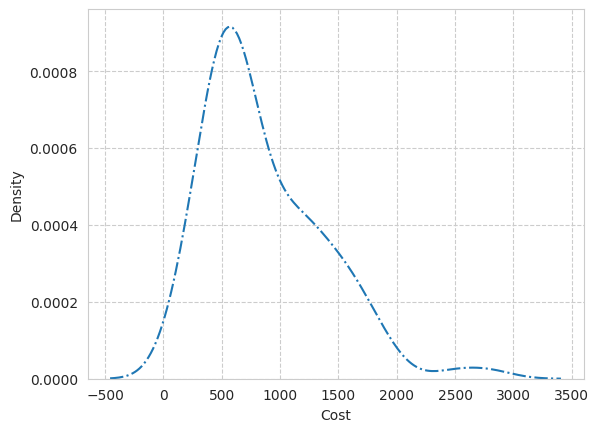

In [96]:
sns.kdeplot(data=restaurants_data, x='Cost', linestyle='-.', label='Density Plot of Cost per person')

print('The average cost per person, taking into account all the restaurants in the dataset=',restaurants_data['Cost'].mean())

(-0.5, 1399.5, 1399.5, -0.5)

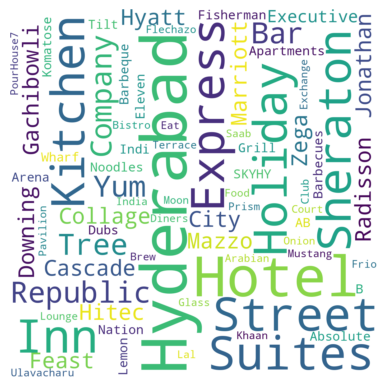

In [97]:
#Creating the text variable

text = " ".join(name for name in restaurants_data.sort_values('Cost',ascending=False).Name[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

(-0.5, 1399.5, 1399.5, -0.5)

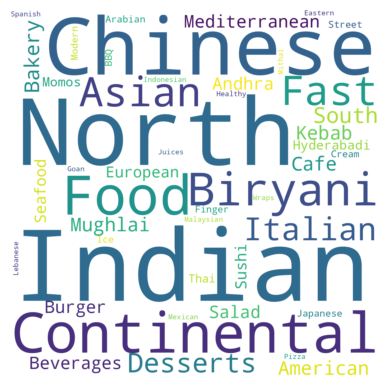

In [98]:
#Creating the text variable

text = " ".join(name for name in restaurants_data.Cuisines )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [99]:
restaurants_data['Cuisines']

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 104, dtype: object

In [100]:
cuisines_list = restaurants_data['Cuisines'].str.split(",")

In [101]:
cuisines_list

0      [Chinese,  Continental,  Kebab,  European,  So...
1                     [Biryani,  North Indian,  Chinese]
2      [Asian,  Mediterranean,  North Indian,  Desserts]
3      [Biryani,  North Indian,  Chinese,  Seafood,  ...
4      [Asian,  Continental,  North Indian,  Chinese,...
                             ...                        
100                                  [Fast Food,  Salad]
101                                    [Bakery,  Mithai]
102                   [North Indian,  Biryani,  Chinese]
103                                          [Fast Food]
104                 [Thai,  Asian,  Chinese,  Malaysian]
Name: Cuisines, Length: 104, dtype: object

In [102]:
cuisines_list = restaurants_data['Cuisines'].str.strip().str.lower()

In [103]:
cuisines_list

0      chinese, continental, kebab, european, south i...
1                         biryani, north indian, chinese
2           asian, mediterranean, north indian, desserts
3      biryani, north indian, chinese, seafood, bever...
4      asian, continental, north indian, chinese, med...
                             ...                        
100                                     fast food, salad
101                                       bakery, mithai
102                       north indian, biryani, chinese
103                                            fast food
104                      thai, asian, chinese, malaysian
Name: Cuisines, Length: 104, dtype: object

In [104]:
# Split the cuisine names into separate words and explode them
cuisine_words = cuisines_list.str.split(',\s+').explode()

# Get the count of unique cuisine names and create a new DataFrame
cuisine_counts = cuisine_words.value_counts().reset_index()
cuisine_counts.columns = ['Cuisine', 'Count']

# Print the resulting DataFrame
print(cuisine_counts)


          Cuisine  Count
0    north indian     60
1         chinese     43
2     continental     21
3         biryani     16
4       fast food     15
5           asian     15
6         italian     14
7        desserts     13
8    south indian      8
9          bakery      7
10          kebab      6
11           cafe      6
12        mughlai      6
13       american      6
14         andhra      5
15          salad      5
16         burger      5
17  mediterranean      5
18      beverages      5
19        seafood      4
20          momos      4
21       european      4
22     hyderabadi      4
23          sushi      4
24           thai      3
25    street food      2
26  modern indian      2
27      ice cream      2
28        arabian      2
29       japanese      2
30    finger food      2
31            bbq      2
32         juices      1
33        mexican      1
34           goan      1
35   healthy food      1
36        spanish      1
37          wraps      1
38     indonesian      1


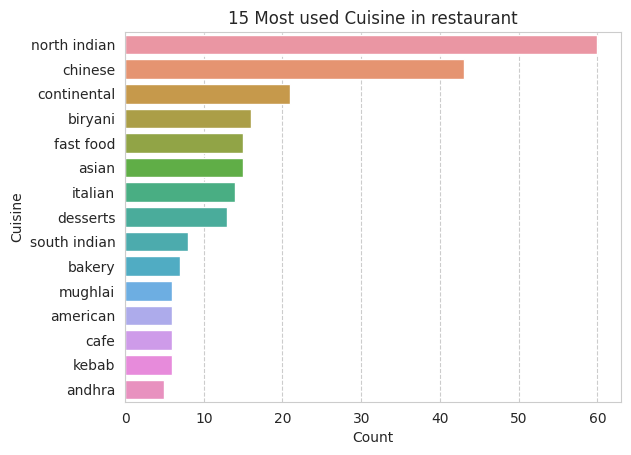

In [105]:
sns.barplot(x='Count',
            y="Cuisine", 
            data=cuisine_counts, 
            order=cuisine_counts.sort_values('Count',ascending=False).Cuisine[:15])

plt.title('15 Most used Cuisine in restaurant')
plt.show()

## Review Data

In [106]:
review_data.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Review_count,Followers,Date,Day
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,15:54:00,0.0,1,2,2019-05-25,Saturday
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,14:20:00,0.0,3,2,2019-05-25,Saturday
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,22:54:00,0.0,2,3,2019-05-24,Friday
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,22:11:00,0.0,1,0,2019-05-24,Friday
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,21:37:00,0.0,3,2,2019-05-24,Friday


In [107]:
review_data.Date

0       2019-05-25
1       2019-05-25
2       2019-05-24
3       2019-05-24
4       2019-05-24
           ...    
9995    2016-06-05
9996    2016-06-04
9997    2016-06-03
9998    2016-05-31
9999    2016-05-31
Name: Date, Length: 9954, dtype: object

In [108]:
review_data["Restaurant"].unique()

array(['Beyond Flavours', 'Paradise', 'Flechazo',
       'Shah Ghouse Hotel & Restaurant', 'Over The Moon Brew Company',
       "The Fisherman's Wharf", 'eat.fit', 'Shah Ghouse Spl Shawarma',
       'Hyper Local', 'Cream Stone', "Sardarji's Chaats & More",
       'Barbeque Nation', 'Absolute Sizzlers',
       'The Lal Street - Bar Exchange', "AB's - Absolute Barbecues",
       'KFC', 'NorFest - The Dhaba', 'Hotel Zara Hi-Fi',
       '10 Downing Street', 'Pakwaan Grand', '13 Dhaba',
       "Jonathan's Kitchen - Holiday Inn Express & Suites", 'B-Dubs',
       'Amul', 'SKYHY', 'Tiki Shack', 'Mustang Terrace Lounge',
       "3B's - Buddies, Bar & Barbecue", 'Behrouz Biryani',
       'Hunger Maggi Point', 'Pot Pourri', 'Pista House',
       'Marsala Food Company', 'Club Rogue',
       'Mazzo - Marriott Executive Apartments',
       'Green Bawarchi Restaurant', 'Banana Leaf Multicuisine Restaurant',
       'Kritunga Restaurant', 'The Glass Onion', 'Deli 9 Bistro',
       'Frio Bistro', 'Kara

In [120]:
def count_reviews(df):
    # Group by restaurant and count the number of reviews
    counts = df.groupby('Restaurant')['Review'].count().reset_index()

    # Rename the 'Review' column to 'no_review'
    counts = counts.rename(columns={'Review': 'no_review'})

    return counts

In [124]:
counts = count_reviews(review_data)

In [123]:
counts.head()

,Restaurant,no_review
0,10 Downing Street,100
1,13 Dhaba,100
2,"3B's - Buddies, Bar & Barbecue",100
3,AB's - Absolute Barbecues,100
4,Absolute Sizzlers,100


In [126]:
counts.describe()

,no_review
count,100.00000
mean,99.54000
std,2.73924
min,77.00000
25%,100.00000
50%,100.00000
75%,100.00000
max,100.00000


In [134]:
avg_ratings = review_data.groupby('Restaurant')['Rating'].mean().reset_index()

In [135]:
avg_ratings

,Restaurant,Rating
0,10 Downing Street,3.80
1,13 Dhaba,3.48
2,"3B's - Buddies, Bar & Barbecue",4.76
3,AB's - Absolute Barbecues,4.88
4,Absolute Sizzlers,3.62
...,...,...
95,Urban Asia - Kitchen & Bar,3.65
96,Yum Yum Tree - The Arabian Food Court,3.56
97,Zega - Sheraton Hyderabad Hotel,4.45
98,Zing's Northeast Kitchen,3.65
